## Load Data

In [1]:
# fashion_mnist
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Reshape Data

In [2]:
X_train = X_train.reshape(60000, -1)
X_test  = X_test.reshape(10000, -1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


## Better Activation

In [3]:
# solution 2: BetteActivationFunction

initializer = tf.keras.initializers.RandomNormal()

# create model
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(keras.layers.Dense(128, activation='relu',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='relu',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='relu',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='relu',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='relu',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='relu',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='relu',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(10))


# optimizer and loss
model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

# training
batch_size = 512
history = model.fit(X_train, y_train, batch_size,
                    validation_data=(X_test, y_test),
                    epochs=150, verbose=2)

# 118/118 - 1s - loss: 0.1339 - accuracy: 0.9540 - val_loss: 0.5454 - val_accuracy: 0.8704 - 516ms/epoch - 4ms/step


Epoch 1/150
118/118 - 9s - loss: 1.1097 - accuracy: 0.6101 - val_loss: 0.7417 - val_accuracy: 0.7270 - 9s/epoch - 73ms/step
Epoch 2/150
118/118 - 1s - loss: 0.6421 - accuracy: 0.7630 - val_loss: 0.6432 - val_accuracy: 0.7560 - 1s/epoch - 9ms/step
Epoch 3/150
118/118 - 1s - loss: 0.5588 - accuracy: 0.7967 - val_loss: 0.7403 - val_accuracy: 0.7074 - 872ms/epoch - 7ms/step
Epoch 4/150
118/118 - 1s - loss: 0.5133 - accuracy: 0.8124 - val_loss: 0.5408 - val_accuracy: 0.8047 - 904ms/epoch - 8ms/step
Epoch 5/150
118/118 - 1s - loss: 0.4794 - accuracy: 0.8272 - val_loss: 0.4741 - val_accuracy: 0.8320 - 504ms/epoch - 4ms/step
Epoch 6/150
118/118 - 1s - loss: 0.4589 - accuracy: 0.8329 - val_loss: 0.6280 - val_accuracy: 0.7811 - 502ms/epoch - 4ms/step
Epoch 7/150
118/118 - 1s - loss: 0.4422 - accuracy: 0.8410 - val_loss: 0.5054 - val_accuracy: 0.8011 - 506ms/epoch - 4ms/step
Epoch 8/150
118/118 - 1s - loss: 0.4262 - accuracy: 0.8446 - val_loss: 0.5948 - val_accuracy: 0.7844 - 603ms/epoch - 5ms/st

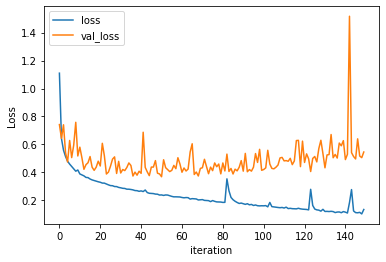

In [4]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

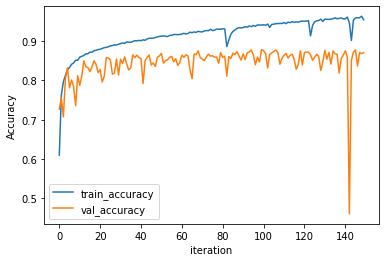

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

## Better Activation (lr=0.05)

In [6]:
# solution 2: BetteActivationFunction reduce LR

initializer = tf.keras.initializers.RandomNormal()

# create model
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(keras.layers.Dense(128, activation='relu',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='relu',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='relu',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='relu',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='relu',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='relu',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='relu',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(10))


# optimizer and loss
model.compile(optimizer=tf.keras.optimizers.SGD(0.005), 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

# training
batch_size = 512
history = model.fit(X_train, y_train, batch_size,
                    validation_data=(X_test, y_test),
                    epochs=150, verbose=2)



Epoch 1/150
118/118 - 1s - loss: 1.2132 - accuracy: 0.5867 - val_loss: 0.9496 - val_accuracy: 0.6557 - 1s/epoch - 11ms/step
Epoch 2/150
118/118 - 1s - loss: 0.7435 - accuracy: 0.7287 - val_loss: 0.7010 - val_accuracy: 0.7585 - 547ms/epoch - 5ms/step
Epoch 3/150
118/118 - 1s - loss: 0.6348 - accuracy: 0.7725 - val_loss: 0.7192 - val_accuracy: 0.7291 - 528ms/epoch - 4ms/step
Epoch 4/150
118/118 - 1s - loss: 0.5736 - accuracy: 0.7932 - val_loss: 0.5957 - val_accuracy: 0.7852 - 541ms/epoch - 5ms/step
Epoch 5/150
118/118 - 1s - loss: 0.5408 - accuracy: 0.8070 - val_loss: 0.6312 - val_accuracy: 0.7759 - 511ms/epoch - 4ms/step
Epoch 6/150
118/118 - 1s - loss: 0.5162 - accuracy: 0.8159 - val_loss: 0.6208 - val_accuracy: 0.7816 - 533ms/epoch - 5ms/step
Epoch 7/150
118/118 - 1s - loss: 0.4935 - accuracy: 0.8250 - val_loss: 0.5646 - val_accuracy: 0.7890 - 519ms/epoch - 4ms/step
Epoch 8/150
118/118 - 1s - loss: 0.4720 - accuracy: 0.8326 - val_loss: 0.5437 - val_accuracy: 0.8069 - 512ms/epoch - 4ms

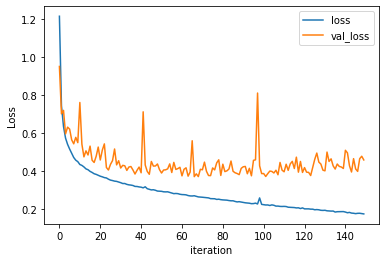

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

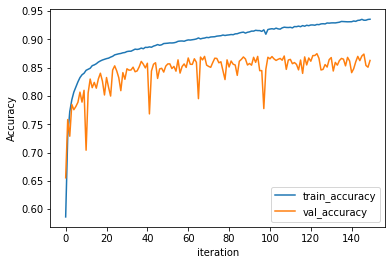

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()